In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm, trange
from genforest import GenForest, accuracy

from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score

palette = ["#0b132b", "#5bc0be", "#88d4ab", "#036666", "#4CC9F0"]
sns.set_theme(style='whitegrid', palette=palette)

seed = 123

# **Wine**

In [10]:
data = load_wine()

df = pd.DataFrame(data['data'], columns=data['feature_names'])
Y = data['target']
X = df.to_numpy()

features = data['feature_names']
targets = data['target_names']    

Eval Model:   0%|          | 0/10 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]



Best-Gen 	mean :: 0.9444444444444444	std :: 0.08606629658238704
Pond-Gen 	mean :: 0.9277777777777778	std :: 0.13619611857923625
RFort-Gen 	mean :: 0.9607843137254901	std :: 0.05011840395472111



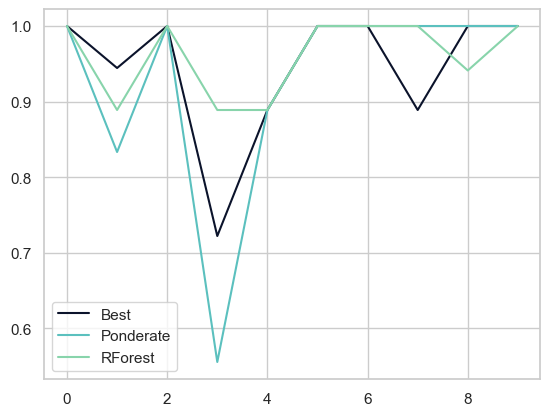

In [11]:
best_gen_acc = []
gen_acc = []
rf_acc = []

n_folds = 10
kf = KFold(n_splits=n_folds)

for train_index, test_index in tqdm(kf.split(X), desc='Eval Model', total=n_folds):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    scaler = StandardScaler()
    scaler.fit(x_train)

    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)

    model = GenForest(features, targets,
                      n_species=100, n_features=np.random.randint(6, 10),
                      n_agents=200, epochs=200,
                      n_deaths=5, rounds_deaths=20)
    model.fit(x_train, y_train)

    
    pred = model.predict(x_test, bests=True)
    best_gen_acc.append(accuracy(pred, y_test))

    pred = model.predict(x_test)
    gen_acc.append(accuracy(pred, y_test))

    
    rfc = RandomForestClassifier(n_estimators=100,
                                 random_state=seed,
                                 bootstrap=True)
    
    rfc.fit(x_train, y_train)
    pred = rfc.predict(x_test)
    rf_acc.append(accuracy(pred, y_test))

print(f'\n\nBest-Gen \tmean :: {np.mean(best_gen_acc)}\tstd :: {np.std(best_gen_acc)}')
print(f'Pond-Gen \tmean :: {np.mean(gen_acc)}\tstd :: {np.std(gen_acc)}')
print(f'RFort-Gen \tmean :: {np.mean(rf_acc)}\tstd :: {np.std(rf_acc)}')
print('=' * 75, '\n')

plt.plot(best_gen_acc, label='Best')
plt.plot(gen_acc, label='Ponderate')
plt.plot(rf_acc, label='RForest')

plt.legend()
plt.show()

# **Iris**

In [12]:
data = load_iris()

X = data['data']
Y = data['target']
features = data['feature_names']
targets = np.array([f'class_{x}' for x in np.unique(Y)])

Eval Model:   0%|          | 0/10 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]



Best-Gen 	mean :: 0.9133333333333333	std :: 0.0896908269804914
Pond-Gen 	mean :: 0.9466666666666667	std :: 0.06531972647421808
RFort-Gen 	mean :: 0.9466666666666667	std :: 0.07180219742846004



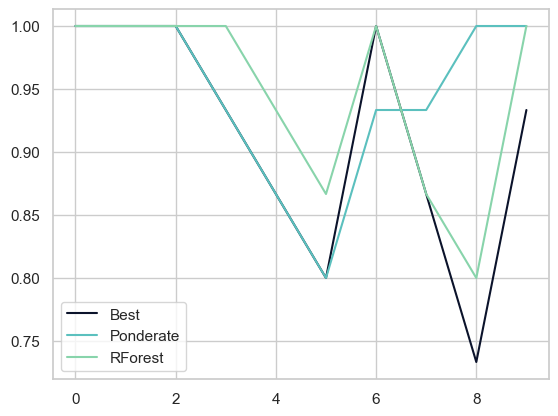

In [13]:
best_gen_acc = []
gen_acc = []
rf_acc = []

n_folds = 10
kf = KFold(n_splits=n_folds)

for train_index, test_index in tqdm(kf.split(X), desc='Eval Model', total=n_folds):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    scaler = StandardScaler()
    scaler.fit(x_train)

    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)

    model = GenForest(features, targets,
                      n_species=100, n_features=8,
                      n_agents=200, epochs=200,
                      n_deaths=10, rounds_deaths=20)
    model.fit(x_train, y_train)

    
    pred = model.predict(x_test, bests=True)
    best_gen_acc.append(accuracy(pred, y_test))

    pred = model.predict(x_test)
    gen_acc.append(accuracy(pred, y_test))

    
    rfc = RandomForestClassifier(n_estimators=100,
                                 random_state=seed,
                                 bootstrap=True)
    
    rfc.fit(x_train, y_train)
    pred = rfc.predict(x_test)
    rf_acc.append(accuracy(pred, y_test))

print(f'\n\nBest-Gen \tmean :: {np.mean(best_gen_acc)}\tstd :: {np.std(best_gen_acc)}')
print(f'Pond-Gen \tmean :: {np.mean(gen_acc)}\tstd :: {np.std(gen_acc)}')
print(f'RFort-Gen \tmean :: {np.mean(rf_acc)}\tstd :: {np.std(rf_acc)}')
print('=' * 75, '\n')

plt.plot(best_gen_acc, label='Best')
plt.plot(gen_acc, label='Ponderate')
plt.plot(rf_acc, label='RForest')

plt.legend()
plt.show()

# **Fetal health**

In [14]:
df = pd.read_csv('fetal_health.csv')

X = df.iloc[:, :-1].to_numpy()
Y = df.iloc[:, -1].to_numpy() - 1

features = df.columns.to_list()
targets = np.array([f'class_{int(x - 1)}' for x in np.unique(Y)])

Eval Model:   0%|          | 0/5 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]



Best-Gen 	mean :: 0.763961336647335	std :: 0.15739221138091422
Pond-Gen 	mean :: 0.6495730461198564	std :: 0.18394568268608724
RFort-Gen 	mean :: 0.8824258492129247	std :: 0.06519864949509102



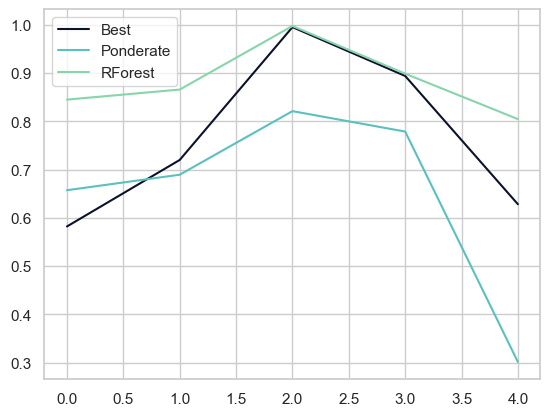

In [15]:
best_gen_acc = []
gen_acc = []
rf_acc = []

n_folds = 5
kf = KFold(n_splits=n_folds)

for train_index, test_index in tqdm(kf.split(X), desc='Eval Model', total=n_folds):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    scaler = StandardScaler()
    scaler.fit(x_train)

    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)

    model = GenForest(features, targets,
                      n_species=100, n_features=np.random.randint(16, 24),
                      n_agents=200, epochs=200,
                      n_deaths=10, rounds_deaths=20)
    model.fit(x_train, y_train)

    
    pred = model.predict(x_test, bests=True)
    best_gen_acc.append(accuracy(pred, y_test))

    pred = model.predict(x_test)
    gen_acc.append(accuracy(pred, y_test))

    
    rfc = RandomForestClassifier(n_estimators=100,
                                 random_state=seed,
                                 bootstrap=True)
    
    rfc.fit(x_train, y_train)
    pred = rfc.predict(x_test)
    rf_acc.append(accuracy(pred, y_test))


print(f'\n\nBest-Gen \tmean :: {np.mean(best_gen_acc)}\tstd :: {np.std(best_gen_acc)}')
print(f'Pond-Gen \tmean :: {np.mean(gen_acc)}\tstd :: {np.std(gen_acc)}')
print(f'RFort-Gen \tmean :: {np.mean(rf_acc)}\tstd :: {np.std(rf_acc)}')
print('=' * 75, '\n')

plt.plot(best_gen_acc, label='Best')
plt.plot(gen_acc, label='Ponderate')
plt.plot(rf_acc, label='RForest')

plt.legend()
plt.show()

# **Glass**

In [34]:
df = pd.read_csv('datasets/glass.csv')
df.Type = df.Type.map({1:0,
                   2:1,
                   3:2,
                   5:3,
                   6:4,
                   7:5})
df.drop_duplicates(inplace=True)

features = df.columns.tolist()
targets = np.array(['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5'])

X = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy()

Eval Model:   0%|          | 0/10 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]

Resample:   0%|          | 0/200 [00:00<?, ?it/s]

Train Model ::   0%|          | 0/100 [00:00<?, ?it/s]



Best-Gen 	mean :: 0.21753246753246752	std :: 0.26745268777817766
Pond-Gen 	mean :: 0.34783549783549783	std :: 0.25979445682761326
RFort-Gen 	mean :: 0.5525974025974026	std :: 0.2614751762927406



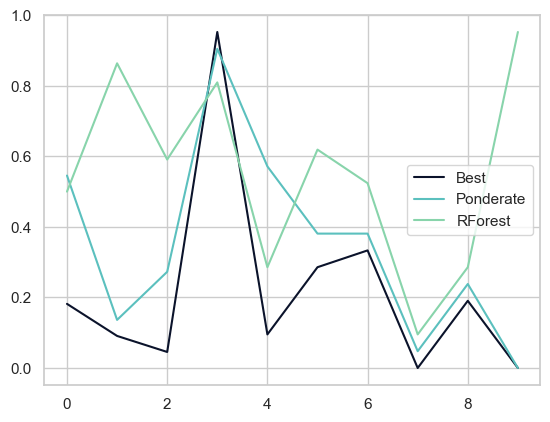

In [35]:
best_gen_acc = []
gen_acc = []
rf_acc = []

n_folds = 10
kf = KFold(n_splits=n_folds)

for train_index, test_index in tqdm(kf.split(X), desc='Eval Model', total=n_folds):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    scaler = StandardScaler()
    scaler.fit(x_train)

    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)

    model = GenForest(features, targets,
                      n_species=100, n_features=np.random.randint(16, 24),
                      n_agents=200, epochs=200,
                      n_deaths=10, rounds_deaths=20)
    model.fit(x_train, y_train)

    
    pred = model.predict(x_test, bests=True)
    best_gen_acc.append(accuracy(pred, y_test))

    pred = model.predict(x_test)
    gen_acc.append(accuracy(pred, y_test))

    
    rfc = RandomForestClassifier(n_estimators=100,
                                 random_state=seed,
                                 bootstrap=True)
    
    rfc.fit(x_train, y_train)
    pred = rfc.predict(x_test)
    rf_acc.append(accuracy(pred, y_test))


print(f'\n\nBest-Gen \tmean :: {np.mean(best_gen_acc)}\tstd :: {np.std(best_gen_acc)}')
print(f'Pond-Gen \tmean :: {np.mean(gen_acc)}\tstd :: {np.std(gen_acc)}')
print(f'RFort-Gen \tmean :: {np.mean(rf_acc)}\tstd :: {np.std(rf_acc)}')
print('=' * 75, '\n')

plt.plot(best_gen_acc, label='Best')
plt.plot(gen_acc, label='Ponderate')
plt.plot(rf_acc, label='RForest')

plt.legend()
plt.show()